In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv('data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170654 entries, 0 to 170653
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    170654 non-null  object 
 1   continent                                   160464 non-null  object 
 2   location                                    170654 non-null  object 
 3   date                                        170654 non-null  object 
 4   total_cases                                 167397 non-null  float64
 5   new_cases                                   167225 non-null  float64
 6   new_cases_smoothed                          165225 non-null  float64
 7   total_deaths                                149405 non-null  float64
 8   new_deaths                                  149429 non-null  float64
 9   new_deaths_smoothed                         147299 non-null  float64
 

In [19]:
df.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
170650,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
170651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
170652,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [20]:
#Removing unnecessary columns 
df.drop(['new_cases_smoothed','total_deaths','new_deaths_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million','icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','tests_per_case','tests_units','total_vaccinations','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','stringency_index','median_age','aged_65_older','aged_70_older','gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','excess_mortality_cumulative_absolute','excess_mortality_cumulative','excess_mortality','excess_mortality_cumulative_per_million','iso_code','continent'], axis = 1, inplace = True)
df

,location,date,total_cases,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,positive_rate,people_vaccinated,people_fully_vaccinated,total_boosters,population,population_density,extreme_poverty
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170649,Zimbabwe,2022-03-19,244452.0,440.0,6.0,0.96,NaN,NaN,0.1037,4418032.0,3443906.0,345784.0,15092171.0,42.729,21.4
170650,Zimbabwe,2022-03-20,244452.0,0.0,0.0,NaN,NaN,NaN,NaN,4418956.0,3444793.0,346888.0,15092171.0,42.729,21.4
170651,Zimbabwe,2022-03-21,244685.0,233.0,3.0,NaN,NaN,NaN,NaN,4432618.0,3446894.0,350549.0,15092171.0,42.729,21.4
170652,Zimbabwe,2022-03-22,244685.0,0.0,0.0,NaN,NaN,NaN,NaN,4503937.0,3450864.0,358670.0,15092171.0,42.729,21.4


In [25]:
#define unnecessary rows
removedRows = ["Africa","Albania","Algeria","Andorra","Angola","Anguilla","Antigua and Barbuda","Aruba","Asia","Azerbaijan","Bahamas","Bahrain","Barbados","Belize","Benin","Bermuda","Bolivia","Bonaire Sint Eustatius and Saba","Bosnia and Herzegovina","Botswana","British Virgin Islands","Bulgaria","Burkina Faso","Burundi","Cameroon","Cape Verde","Cayman Islands","Central African Republic","Chad","Comoros","Congo","Costa Rica","Cote d'Ivoire","Croatia","Cuba","Curacao","Cyprus","Democratic Republic of Congo","Djibouti","Dominica","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Eswatini","Ethiopia","Europe","European Union","Faeroe Islands","Falkland Islands","French Polynesia","Gabon","Gambia","Georgia","Ghana","Gibraltar","Greenland","Grenada","Guatemala","Guernsey","Guinea","Guinea-Bissau","Guyana","Haiti","High income","Honduras","Iceland","International","Iran","Iraq","Isle of Man","Israel","Jamaica","Jersey","Jordan","Kenya","Kosovo","Kuwait","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Low income","Lower middle income","Macao","Madagascar","Malawi","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Micronesia (country)","Monaco","Montenegro","Montserrat","Morocco","Mozambique","Namibia","New Caledonia","Nicaragua","Niger","Nigeria","Niue","North America","North Macedonia","Northern Cyprus","Oceania","Oman","Palestine","Panama","Paraguay","Pitcairn","Qatar","Romania","Rwanda","Saint Helena","Saint Kitts and Nevis","Saint Lucia","Saint Pierre and Miquelon","Saint Vincent and the Grenadines","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Sint Maarten (Dutch part)","Slovenia","Somalia","South America","South Sudan","Sudan","Suriname","Syria","Tanzania","Togo","Tokelau","Trinidad and Tobago","Tunisia","Turkmenistan","Turks and Caicos Islands","Uganda","Ukraine","United Arab Emirates","Upper middle income","Uruguay","Uzbekistan","Vatican","Wallis and Futuna","World","Yemen","Zambia","Zimbabwe"]
APJ = ["Afghanistan","Australia","Bangladesh","Bhutan","Brunei","Cambodia","China","Cook Islands","Fiji","Hong Kong","India","Indonesia","Japan","Kiribati","Laos","Malaysia","Maldives","Mongolia","Myanmar","Nauru","Nepal","New Zealand","Pakistan","Palau","Papua New Guinea","Philippines","Samoa","Singapore","Solomon Islands","South Korea","Sri Lanka","Taiwan","Thailand","Timor","Tonga","Tuvalu","Vanuatu","Vietnam"]
AMER = ["Argentina","Brazil","Canada","Chile","Colombia","Mexico","Peru","United States"]
EMEA = ["Armenia","Austria","Belarus","Belgium","Czechia","Denmark","Finland","France","Germany","Greece","Hungary","Ireland","Italy","Kazakhstan","Kyrgyzstan","Luxembourg","Moldova","Netherlands","Norway","Poland","Portugal","Russia","Slovakia","South Africa","Spain","Sweden","Switzerland","Tajikistan","Turkey"]
# Remove unnecessary rows
df = df[df.location.isin(removedRows) == False]
df

,location,date,total_cases,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,positive_rate,people_vaccinated,people_fully_vaccinated,total_boosters,population,population_density,extreme_poverty
0,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
1,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
3,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
4,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167153,Vietnam,2022-03-19,7791841.0,424729.0,77.0,1.4,0.0,0.0,0.0,79693650.0,77677923.0,44288872.0,98168829.0,308.127,2.0
167154,Vietnam,2022-03-20,7958048.0,166207.0,63.0,0.0,0.0,0.0,0.0,79696647.0,77686643.0,44444848.0,98168829.0,308.127,2.0
167155,Vietnam,2022-03-21,8089761.0,131713.0,69.0,0.0,0.0,0.0,0.0,79701388.0,77696920.0,44631023.0,98168829.0,308.127,2.0
167156,Vietnam,2022-03-22,8338914.0,249153.0,65.0,0.0,0.0,0.0,0.0,79947189.0,77754108.0,45443077.0,98168829.0,308.127,2.0


In [26]:
df = df.replace(np.nan, 0)

In [27]:
df = df.loc[(df == 0).any(axis=1)]
df

,location,date,total_cases,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,positive_rate,people_vaccinated,people_fully_vaccinated,total_boosters,population,population_density,extreme_poverty
0,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
1,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
2,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
3,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
4,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,54.422,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167153,Vietnam,2022-03-19,7791841.0,424729.0,77.0,1.4,0.0,0.0,0.0,79693650.0,77677923.0,44288872.0,98168829.0,308.127,2.0
167154,Vietnam,2022-03-20,7958048.0,166207.0,63.0,0.0,0.0,0.0,0.0,79696647.0,77686643.0,44444848.0,98168829.0,308.127,2.0
167155,Vietnam,2022-03-21,8089761.0,131713.0,69.0,0.0,0.0,0.0,0.0,79701388.0,77696920.0,44631023.0,98168829.0,308.127,2.0
167156,Vietnam,2022-03-22,8338914.0,249153.0,65.0,0.0,0.0,0.0,0.0,79947189.0,77754108.0,45443077.0,98168829.0,308.127,2.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53341 entries, 0 to 167157
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 53341 non-null  object 
 1   date                     53341 non-null  object 
 2   total_cases              53341 non-null  float64
 3   new_cases                53341 non-null  float64
 4   new_deaths               53341 non-null  float64
 5   reproduction_rate        53341 non-null  float64
 6   icu_patients             53341 non-null  float64
 7   hosp_patients            53341 non-null  float64
 8   positive_rate            53341 non-null  float64
 9   people_vaccinated        53341 non-null  float64
 10  people_fully_vaccinated  53341 non-null  float64
 11  total_boosters           53341 non-null  float64
 12  population               53341 non-null  float64
 13  population_density       53341 non-null  float64
 14  extreme_poverty      

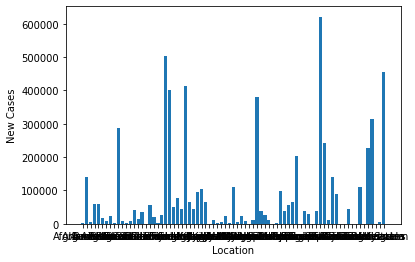

In [28]:
x = df['location']
y = df['new_cases']

plt.xlabel('Location')
plt.ylabel('New Cases')
plt.bar(x,y)
plt.show()